# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



In [80]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('student_lifestyle_100k.csv', encoding='ISO-8859-1')
df.head()

,Student_ID,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression
0,1001,22,Female,Science,3.50,7.3,3.3,3.4,114,5,False
1,1002,20,Male,Engineering,2.72,5.5,7.2,6.0,142,2,False
2,1003,20,Male,Medical,3.01,5.4,2.3,1.8,137,3,False
3,1004,21,Male,Engineering,3.63,8.1,2.0,4.6,130,3,False
4,1005,19,Male,Arts,3.14,6.8,2.6,4.3,4,6,False


# Dataset Summary 

This dataset comes from Kaggle and is a represention of a large-scale, synthetic survey of 100,000 university students. It was generated programmatically to reflect real-world trends observed in academic research related to student lifestyle, academic performance, and mental health.

The dataset includes columns for age, gender, department, CGPA, sleep duration, study hours, social media usage, physical activity, stress level, and depression status. 

I found this dataset interesting because it allows exploration of how daily habits like sleep, studying, and social media use correlate to both academic success and mental health outcomes such as stress and depression.

# 5 Interesting Questions to Explore

1. Is the average CGPA different for students with depression compared to students without depression?

2. How does average sleep duration differ between students with and without depression?

3. How does physical activity relate to both CGPA and depression status?

4. Is there a relationship between social media usage and stress level?

5. Do students who study more hours per day tend to have higher CGPAs?

# Is the average CGPA different for students with depression compared to students without depression?

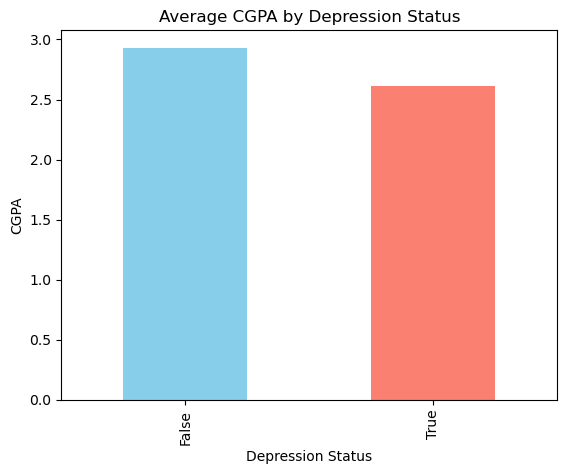

,count,mean,std,min,25%,50%,75%,max
Depression,,,,,,,,
False,89938.0,2.930177,0.522991,1.56,2.51,2.94,3.37,4.0
True,10062.0,2.613530,0.529498,1.69,2.20,2.43,3.01,4.0


In [81]:
df.groupby('Depression')['CGPA'].mean().plot(
    kind='bar',
    color=['skyblue','salmon']
)

plt.title('Average CGPA by Depression Status')
plt.xlabel('Depression Status')
plt.ylabel('CGPA')
plt.show()

df.groupby('Depression')['CGPA'].describe()


Students who report depression have a noticeably lower average and median CGPA compared to students without depression. The median CGPA for depressed students is 2.43, compared to 2.94 for non-depressed students, indicating that the difference is not driven by outliers. While students in both groups can achieve high CGPAs, depression is associated with a consistent downward shift in academic performance.

# How does average sleep duration differ between students with and without depression?

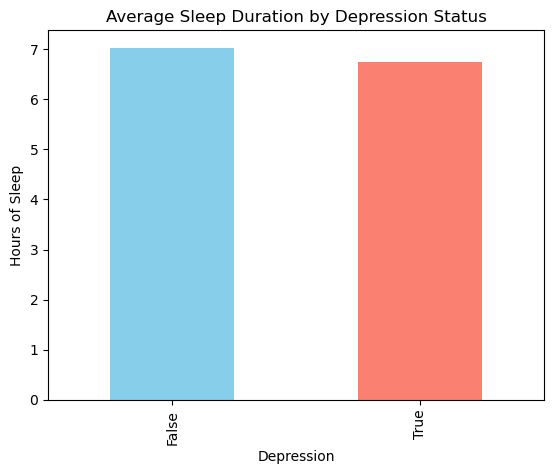

,count,mean,std,min,25%,50%,75%,max
Depression,,,,,,,,
False,89938.0,7.025263,1.478592,3.0,6.0,7.0,8.0,12.0
True,10062.0,6.738660,1.645319,3.0,5.6,6.8,7.9,12.0


In [82]:
df.groupby('Depression')['Sleep_Duration'].mean().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Average Sleep Duration by Depression Status')
plt.ylabel('Hours of Sleep')
plt.show()


df.groupby('Depression')['Sleep_Duration'].describe()

Students reporting depression sleep slightly less on average than students without depression. The average sleep duration for non-depressed students is approximately 7.03 hours per night, compared to 6.74 hours for depressed students. Median sleep duration and quartile ranges also show a consistent downward shift for depressed students, suggesting that reduced sleep is associated with depression status. Additionally, sleep duration among depressed students shows greater variability.

# How does physical activity relate to both CGPA and depression status?

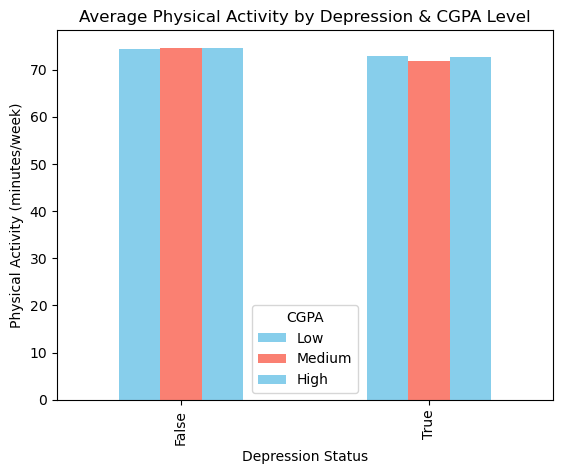

count       mean        std  min    25%   50%    75%  \
Depression CGPA                                                             
False      Low     22177.0  74.449565  43.393617  0.0  37.00  74.0  112.0   
           Medium  52383.0  74.604776  43.335733  0.0  37.00  75.0  112.0   
           High    15378.0  74.539277  43.295887  0.0  37.00  75.0  112.0   
True       Low      5885.0  72.881563  43.606556  0.0  34.00  72.0  111.0   
           Medium   3249.0  71.905817  43.339709  0.0  34.00  70.0  109.0   
           High      928.0  72.664871  43.871819  0.0  35.75  72.0  110.0   

                     max  
Depression CGPA           
False      Low     149.0  
           Medium  149.0  
           High    149.0  
True       Low     149.0  
           Medium  149.0  
           High    149.0

In [83]:
cgpa_bins = pd.cut(df['CGPA'], bins=[0, 2.5, 3.5, 4.0], labels=['Low', 'Medium', 'High'])

df.groupby(['Depression', cgpa_bins], observed=True)['Physical_Activity'].mean().unstack().plot(
    kind='bar',
    color=['skyblue','salmon']
)

plt.title('Average Physical Activity by Depression & CGPA Level')
plt.xlabel('Depression Status')
plt.ylabel('Physical Activity (minutes/week)')
plt.show()

df.groupby(['Depression', cgpa_bins], observed=True)['Physical_Activity'].describe()


The analysis shows that physical activity levels are relatively consistent across all CGPA categories, indicating little relationship between physical activity and academic performance. However, students reporting depression engage in slightly less physical activity on average compared to non-depressed students across all CGPA levels. While the difference is modest, it is consistent, suggesting a small association between lower physical activity and depression status.

# Is there a relationship between social media usage and stress level?

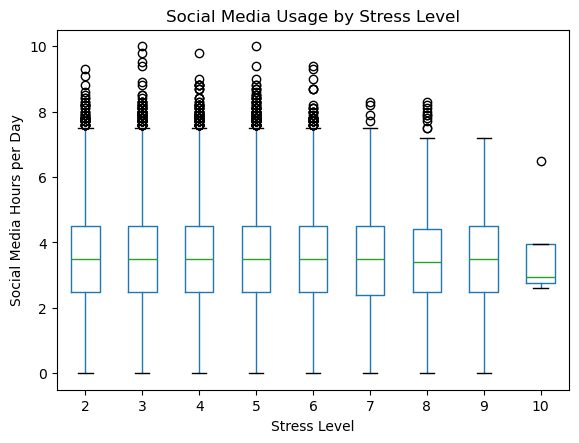

,count,mean,std,min,25%,50%,75%,max
Social_Media_Hours,,,,,,,,
"(-0.01, 2.0]",16667.0,4.137097,1.415099,2.0,3.0,4.0,5.0,9.0
"(2.0, 4.0]",47704.0,4.127683,1.429571,2.0,3.0,4.0,5.0,10.0
"(4.0, 6.0]",31127.0,4.131751,1.418418,2.0,3.0,4.0,5.0,9.0
"(6.0, 8.0]",4388.0,4.154057,1.440552,2.0,3.0,4.0,5.0,10.0
"(8.0, 10.0]",114.0,4.114035,1.412703,2.0,3.0,4.0,5.0,8.0


In [84]:
social_bins = pd.cut(df['Social_Media_Hours'], bins=5)


stress_bins = pd.cut(df['Stress_Level'], bins=5)




df.boxplot(
    column='Social_Media_Hours',
    by='Stress_Level',
    grid=False
)

plt.title('Social Media Usage by Stress Level')
plt.suptitle('') 
plt.xlabel('Stress Level')
plt.ylabel('Social Media Hours per Day')
plt.show()


df.groupby(social_bins, observed=True)['Stress_Level'].describe()


The descriptive statistics show that the median and interquartile range of stress levels are nearly identical across all levels of social media usage, indicating no strong relationship between typical stress and social media hours. However, extreme stress values occur across all usage groups. Because very high social media usage is relatively rare in the dataset, its potential impact on stress is not strongly reflected in mean values.

# Do students who study more hours per day tend to have higher CGPAs?

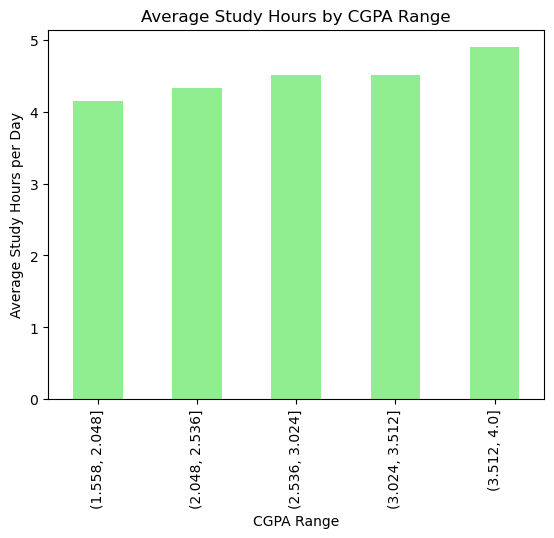

,count,mean,std,min,25%,50%,75%,max
CGPA,,,,,,,,
"(1.558, 2.048]",3780.0,4.146005,1.676790,0.0,3.0,4.3,5.4,10.6
"(2.048, 2.536]",25981.0,4.327582,1.858500,0.0,3.1,4.4,5.6,12.6
"(2.536, 3.024]",27322.0,4.515852,1.971356,0.0,3.2,4.5,5.8,12.3
"(3.024, 3.512]",27176.0,4.503886,1.983376,0.0,3.1,4.5,5.8,12.8
"(3.512, 4.0]",15741.0,4.895826,2.158520,0.0,3.4,4.8,6.4,12.3


In [85]:
cgpa_bins = pd.cut(df['CGPA'], bins=5)

df.groupby(cgpa_bins, observed=True)['Study_Hours'].mean().plot(
    kind='bar',
    color='lightgreen'
)

plt.title('Average Study Hours by CGPA Range')
plt.xlabel('CGPA Range')
plt.ylabel('Average Study Hours per Day')
plt.show()


df.groupby(cgpa_bins, observed=True)['Study_Hours'].describe()




Students with higher CGPAs tend to study more hours per day on average. Mean study time increases steadily across CGPA ranges, rising from approximately 4.15 hours per day for students with the lowest CGPAs to nearly 4.9 hours per day for students in the highest CGPA range. Median study hours show a similar upward trend, suggesting a positive relationship between study time and academic performance.